Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

Load and Explore Data

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

First few rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


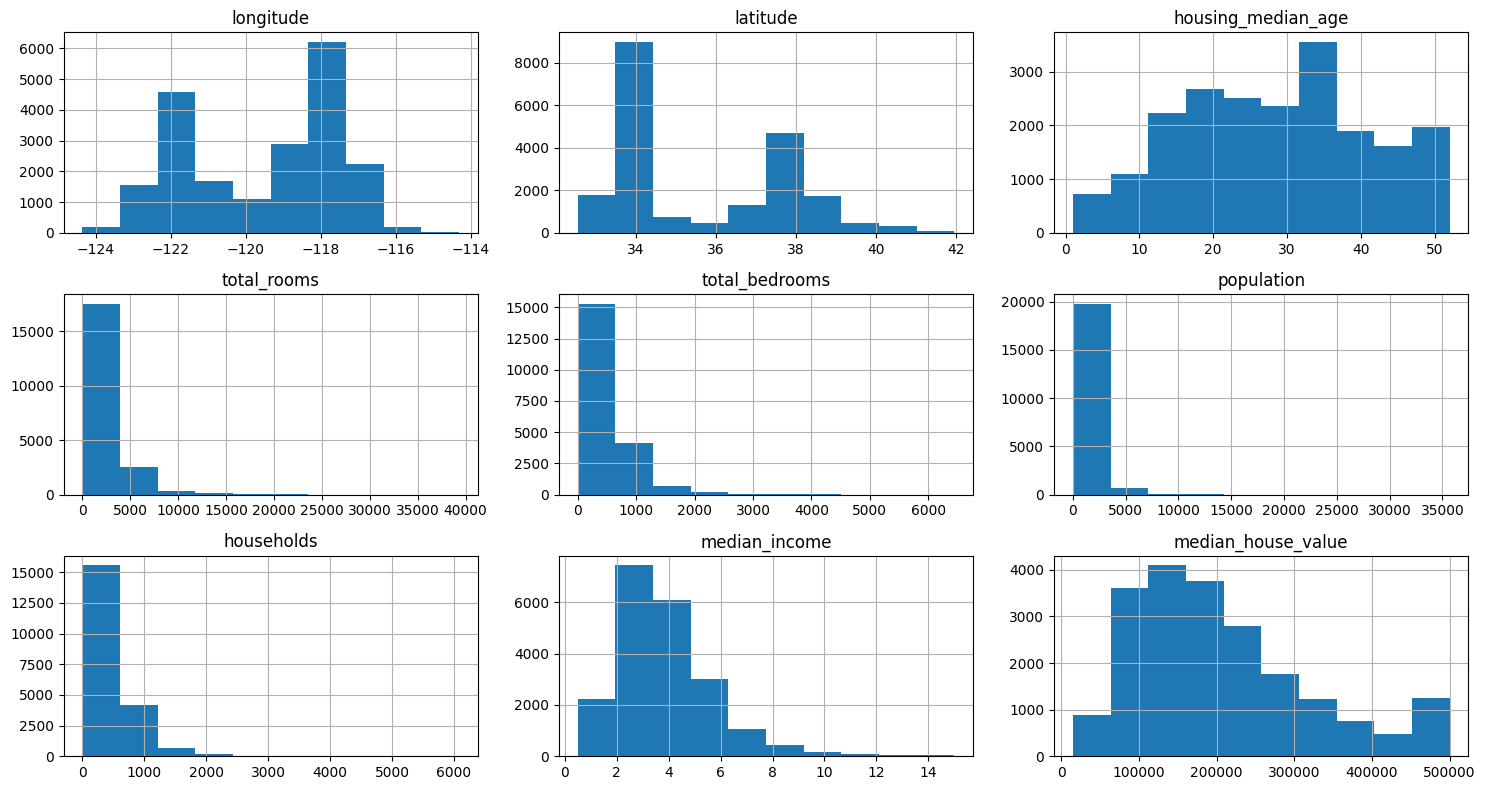

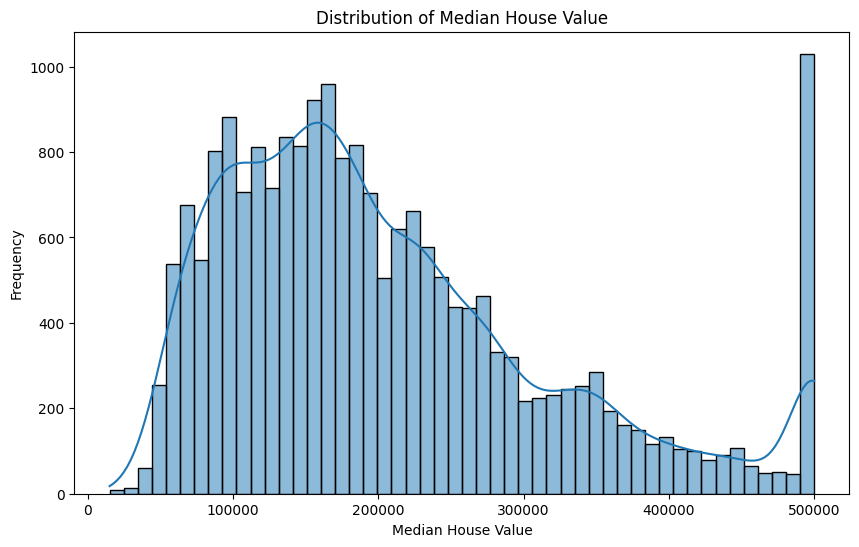

In [14]:
# Load the dataset
data = pd.read_csv("housing.csv")

# Display dataset information and first few rows
print("Dataset Info:")
data.info()
print("\nFirst few rows:")
display(data.head())

# Display the entire dataset
display(data)

# Visualize distribution of all numerical features
data.hist(figsize=(15, 8))
plt.tight_layout()
plt.show()

# Visualize distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

Data Preprocessing

Handle Missing Values

In [15]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [16]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Encode Categorical Variables

In [17]:
# One-hot encode ocean_proximity
data = data.join(pd.get_dummies(data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# Display the dataset after encoding
display(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


Feature Engineering

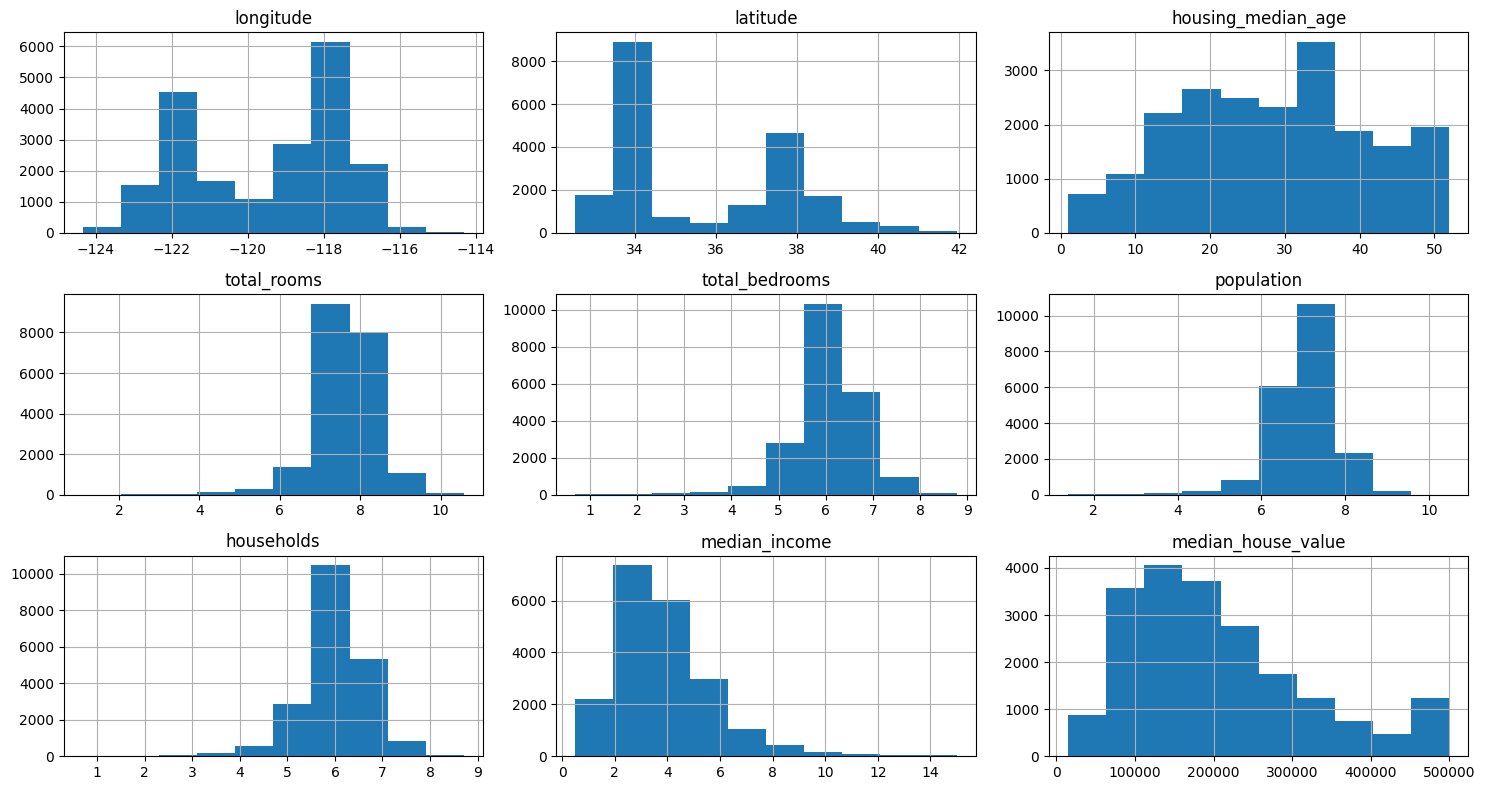

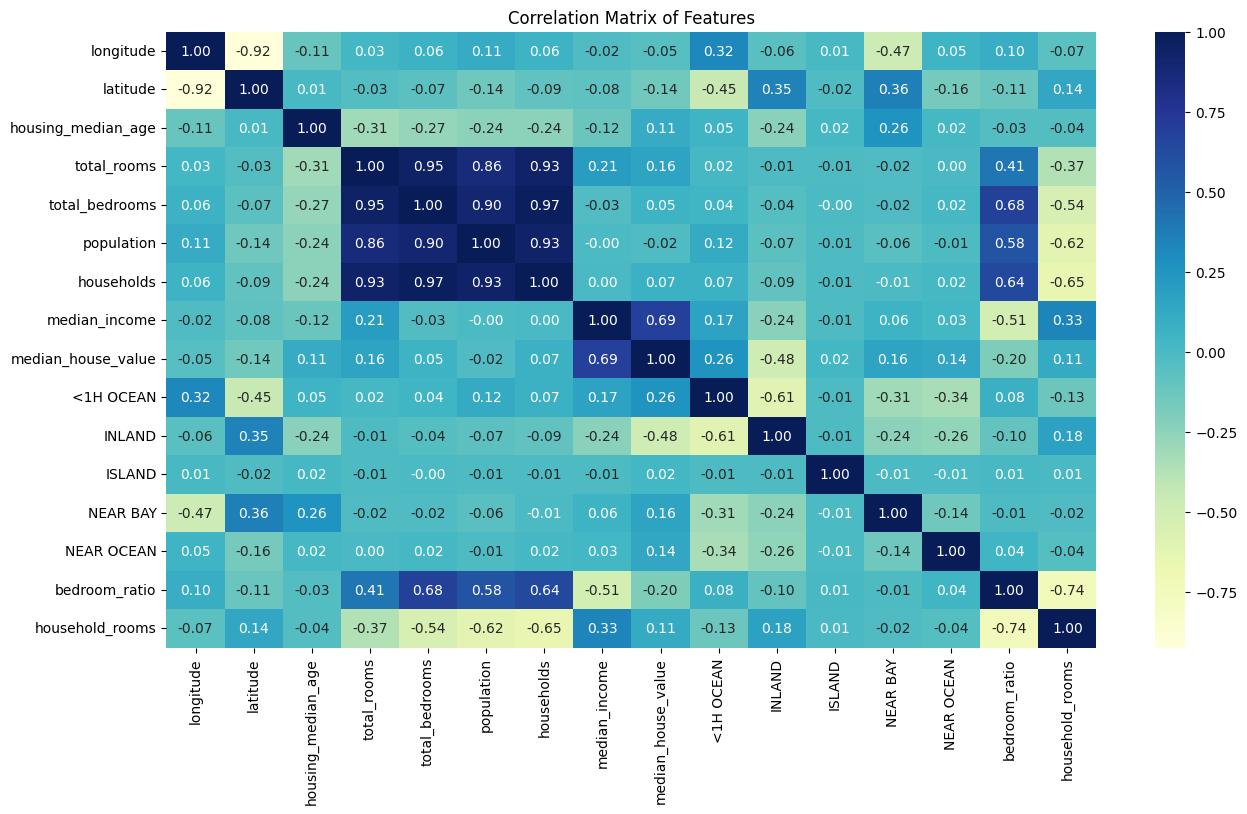

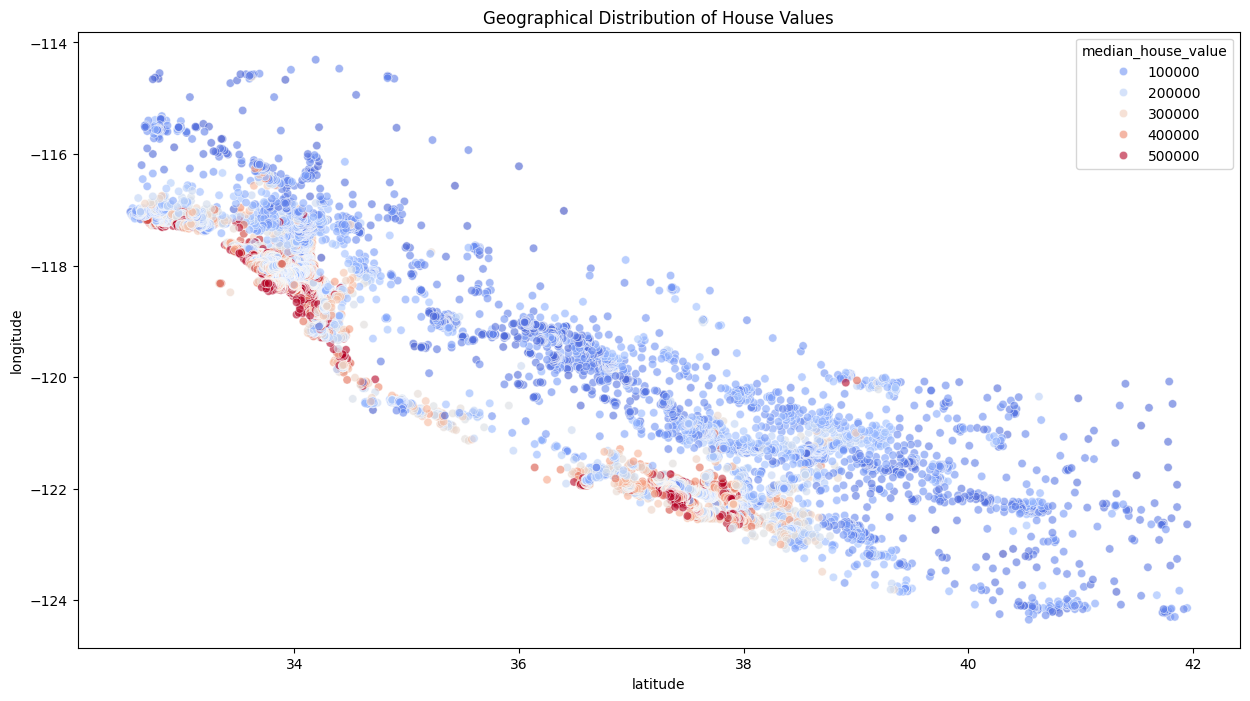

In [18]:
# Log-transform skewed numerical features
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

# Visualize distributions after log transformation
data.hist(figsize=(15, 8))
plt.tight_layout()
plt.show()

# Create new features
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']

# Visualize correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Scatter plot of geographical features
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm', alpha=0.6)
plt.title('Geographical Distribution of House Values')
plt.show()

Split the Dataset

In [19]:
# Define features (X) and target (y)
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Split the data into training and testing sets (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16346, 15)
Testing set shape: (4087, 15)


Feature Scaling

In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

Model Training and Evaluation

Linear Regression

In [21]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Calculate R² and RMSE for training and test sets
lr_r2_train = r2_score(y_train, y_pred_lr_train)
lr_r2_test = r2_score(y_test, y_pred_lr_test)
lr_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))

print("Linear Regression Results:")
print(f"Training R² Score: {lr_r2_train:.4f} ({lr_r2_train * 100:.1f}%)")
print(f"Testing R² Score: {lr_r2_test:.4f} ({lr_r2_test * 100:.1f}%)")
print(f"Training RMSE: {lr_rmse_train:.2f}")
print(f"Testing RMSE: {lr_rmse_test:.2f}")

Linear Regression Results:
Training R² Score: 0.6716 (67.2%)
Testing R² Score: 0.6687 (66.9%)
Training RMSE: 65935.84
Testing RMSE: 67305.50


Random Forest Regressor

In [22]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)

# Calculate R² and RMSE for training and test sets
rf_r2_train = r2_score(y_train, y_pred_rf_train)
rf_r2_test = r2_score(y_test, y_pred_rf_test)
rf_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

print("Random Forest Results:")
print(f"Training R² Score: {rf_r2_train:.4f} ({rf_r2_train * 100:.1f}%)")
print(f"Testing R² Score: {rf_r2_test:.4f} ({rf_r2_test * 100:.1f}%)")
print(f"Training RMSE: {rf_rmse_train:.2f}")
print(f"Testing RMSE: {rf_rmse_test:.2f}")

Random Forest Results:
Training R² Score: 0.9741 (97.4%)
Testing R² Score: 0.8194 (81.9%)
Training RMSE: 18503.13
Testing RMSE: 49690.99


Hyperparameter Tuning for Random Forest

In [23]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 4, 8],
    'min_samples_split': [2, 4]
}

# Initialize GridSearchCV (using neg_mean_squared_error )
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on training and test sets
y_pred_best_rf_train = best_rf_model.predict(X_train_scaled)
y_pred_best_rf_test = best_rf_model.predict(X_test_scaled)

# Calculate R² and RMSE for training and test sets
best_rf_r2_train = r2_score(y_train, y_pred_best_rf_train)
best_rf_r2_test = r2_score(y_test, y_pred_best_rf_test)
best_rf_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_best_rf_train))
best_rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_best_rf_test))

print("Tuned Random Forest Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training R² Score: {best_rf_r2_train:.4f} ({best_rf_r2_train * 100:.1f}%)")
print(f"Testing R² Score: {best_rf_r2_test:.4f} ({best_rf_r2_test * 100:.1f}%)")
print(f"Training RMSE: {best_rf_rmse_train:.2f}")
print(f"Testing RMSE: {best_rf_rmse_test:.2f}")

Tuned Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 300}
Training R² Score: 0.9684 (96.8%)
Testing R² Score: 0.8222 (82.2%)
Training RMSE: 20437.83
Testing RMSE: 49312.89


Model Comparison


Model Comparison:


,Model,Training R² (%),Testing R² (%),Training RMSE,Testing RMSE
0,Linear Regression,67.16,66.87,65935.84,67305.50
1,Random Forest,97.41,81.94,18503.13,49690.99
2,Tuned Random Forest,96.84,82.22,20437.83,49312.89


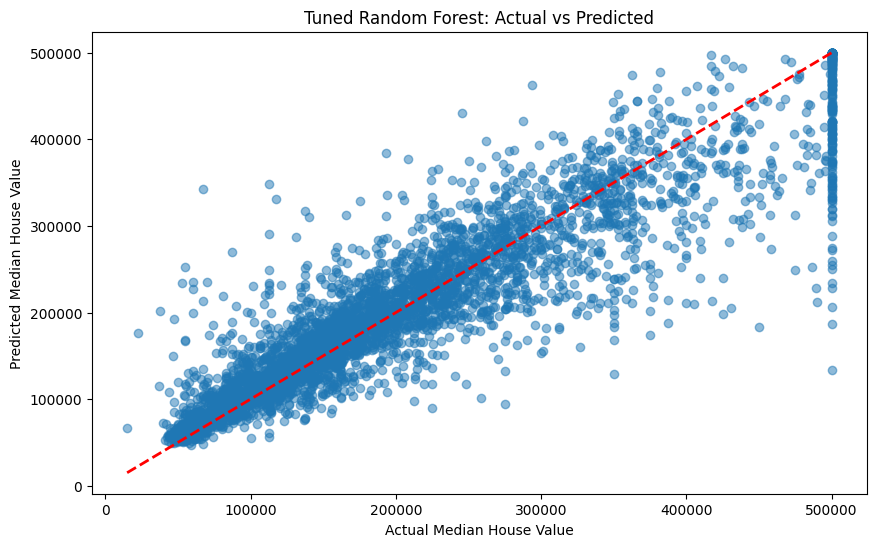

In [24]:
# Summarize results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Tuned Random Forest'],
    'Training R² (%)': [lr_r2_train * 100, rf_r2_train * 100, best_rf_r2_train * 100],
    'Testing R² (%)': [lr_r2_test * 100, rf_r2_test * 100, best_rf_r2_test * 100],
    'Training RMSE': [lr_rmse_train, rf_rmse_train, best_rf_rmse_train],
    'Testing RMSE': [lr_rmse_test, rf_rmse_test, best_rf_rmse_test]
})

print("\nModel Comparison:")
display(results.round(2))

# Visualize predictions vs actual values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Tuned Random Forest: Actual vs Predicted')
plt.show()